In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Clean_Dataset.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

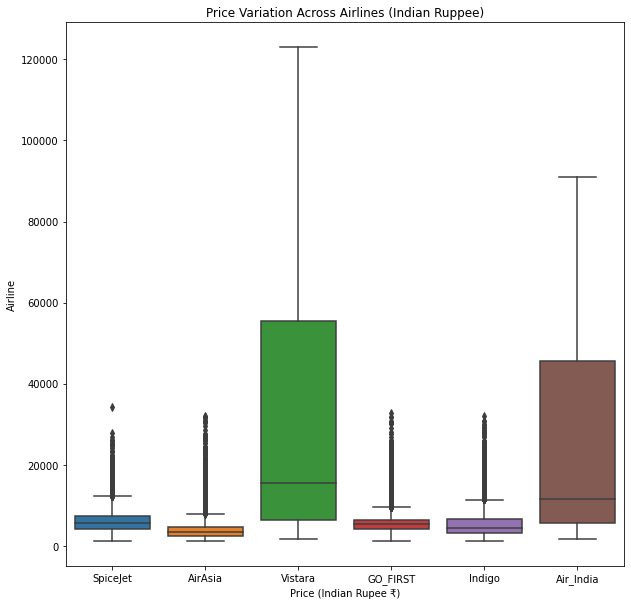

In [6]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='airline', y='price', data=data)
ax.set(xlabel = 'Price (Indian Rupee ₹)')
ax.set(ylabel = 'Airline')
ax.set(title='Price Variation Across Airlines (Indian Ruppee)');

In [7]:
data['price_usd'] = data['price'] * 0.013
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_usd
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,77.389
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,77.389
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,77.428
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,77.415
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,77.415


In [8]:
data.describe()

,duration,days_left,price,price_usd
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523,271.565587
std,7.191997,13.561004,22697.767366,295.070976
min,0.830000,1.000000,1105.000000,14.365000
25%,6.830000,15.000000,4783.000000,62.179000
50%,11.250000,26.000000,7425.000000,96.525000
75%,16.170000,38.000000,42521.000000,552.773000
max,49.830000,49.000000,123071.000000,1599.923000


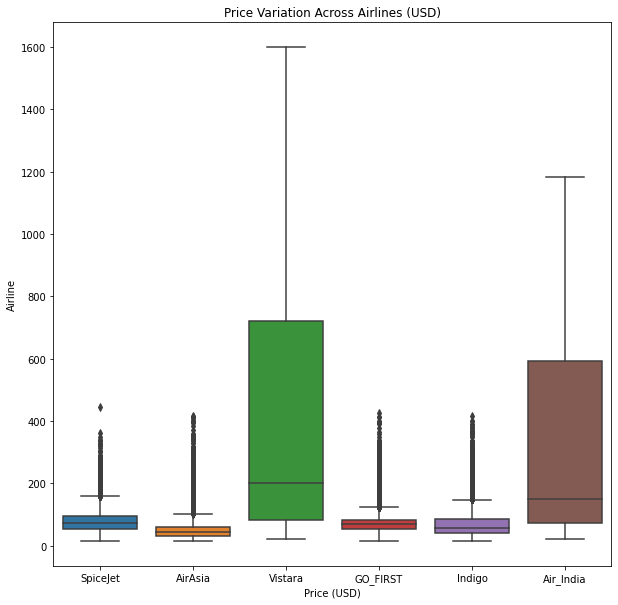

In [9]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='airline', y='price_usd', data=data)
ax.set(xlabel = 'Price (USD)')
ax.set(ylabel = 'Airline')
ax.set(title='Price Variation Across Airlines (USD)');

In [10]:
data[data['days_left'] < 7].describe().price_usd

count    26410.000000
mean       346.288322
std        304.460471
min         25.701000
25%        130.104000
50%        184.301000
75%        616.148000
max       1599.923000
Name: price_usd, dtype: float64

[Text(0, 0.5, 'Days Left Before Departure')]

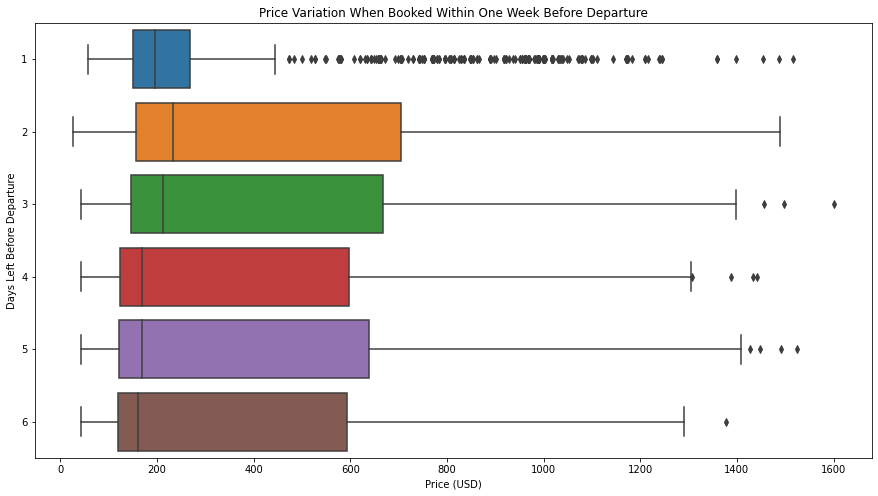

In [11]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='price_usd', y='days_left', data=data[data['days_left'] < 7], orient='h')
ax.set(title='Price Variation When Booked Within One Week Before Departure');
ax.set(xlabel = 'Price (USD)')
ax.set(ylabel = 'Days Left Before Departure')

[Text(0, 0.5, 'Days Left Before Departure')]

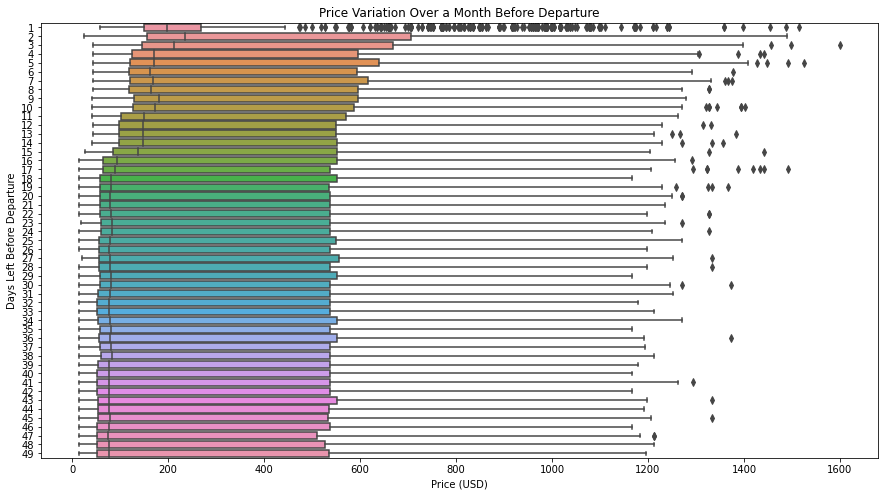

In [12]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='price_usd', y='days_left', data=data[data['days_left'] < 50], orient='h')
ax.set(title='Price Variation Over a Month Before Departure');
ax.set(xlabel = 'Price (USD)')
ax.set(ylabel = 'Days Left Before Departure')

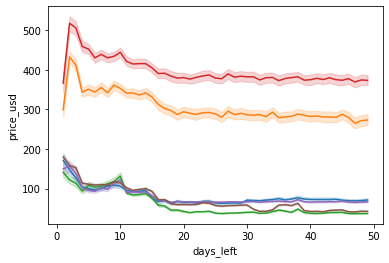

In [203]:
dfSJ = data.query('airline == "SpiceJet"')
ax1 = sns.lineplot(data=dfSJ, x='days_left', y='price_usd')
dfAI = data.query('airline == "Air_India"')
ax1 = sns.lineplot(data=dfAI, x='days_left', y='price_usd')
dfAA = data.query('airline == "AirAsia"')
ax1 = sns.lineplot(data=dfAA, x='days_left', y='price_usd')
dfV = data.query('airline == "Vistara"')
ax1 = sns.lineplot(data=dfV, x='days_left', y='price_usd')
dfG = data.query('airline == "GO_FIRST"')
ax1 = sns.lineplot(data=dfG, x='days_left', y='price_usd')
dfI = data.query('airline == "Indigo"')
ax1 = sns.lineplot(data=dfI, x='days_left', y='price_usd')

In [197]:
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


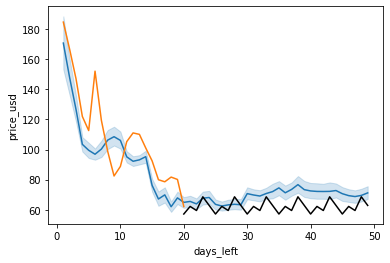

In [209]:
training = dfSJ[(dfSJ['days_left'] >= 0) & (dfSJ['days_left'] <= 20)]
test = dfSJ[dfSJ['days_left'] > 20]

d1 = training.set_index('days_left')['price_usd']
d1 = d1.groupby('days_left').mean()

fit1 = ExponentialSmoothing(d1,seasonal = "add", seasonal_periods = 5).fit()
fore1 = fit1.forecast(30)

ax2 = sns.lineplot(data=dfSJ, x='days_left', y='price_usd')
ax2 = sns.lineplot(data=d1, x=d1.index, y = fit1.fittedvalues)
plt.plot(fore1, color = 'black')